In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime,timedelta

## Generate some data

In [2]:
errors=np.random.normal(0,1,400)

In [4]:
len(errors)

400

In [5]:
date_index=pd.date_range(start='9/1/2019',end='1/1/2020')

In [6]:
date_index

DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=123, freq='D')

In [7]:
avg=50

In [8]:
series=[]
for t in range(1,len(date_index)+1):
    series.append(avg+0.4*errors[t-1]+0.3*errors[t-2]+errors[t])

In [9]:
series

[50.43790802051291,
 49.777215788132914,
 50.89869100790849,
 51.229056079301,
 51.143062348061754,
 49.742122868406746,
 50.41214640273223,
 48.915601222354034,
 50.3020707122472,
 50.14831322273536,
 50.68682398951058,
 51.53339635104667,
 51.582169707686596,
 51.8391014771811,
 53.300666579120794,
 51.92609365883114,
 51.942562818041154,
 50.90450892024639,
 49.71105072567506,
 48.96543076750889,
 48.791771598518416,
 51.07556944905104,
 49.621167902700236,
 49.84761723808231,
 49.45021100756713,
 50.22545801773807,
 49.16031469268888,
 51.26799611397976,
 49.48625197387951,
 51.37236673828286,
 51.521082288602955,
 51.58959044755965,
 51.38627495514496,
 51.88783392610603,
 50.376325798653724,
 51.13352390340114,
 50.46058086542301,
 50.84242193211258,
 51.57310656820543,
 49.97160477689904,
 50.81266071269999,
 50.357348130655595,
 48.316255419120786,
 50.945181101278216,
 50.272511067612825,
 50.300181169818195,
 50.027851520242066,
 50.11329841428302,
 49.10423401602298,
 49.958

In [10]:
len(series)

123

In [11]:
series=pd.Series(series,date_index)

In [12]:
series=series.asfreq(pd.infer_freq(series.index))

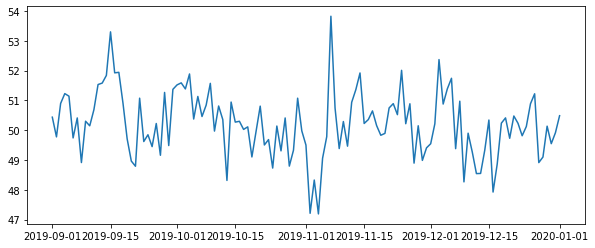

In [13]:
plt.figure(figsize=(10,4))
plt.plot(series)

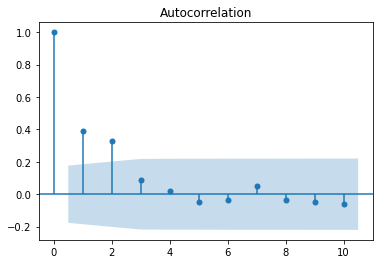

In [14]:
acf_plot=plot_acf(series,lags=10)

In [15]:
## Acf tells us that we are going to use MA(2) model

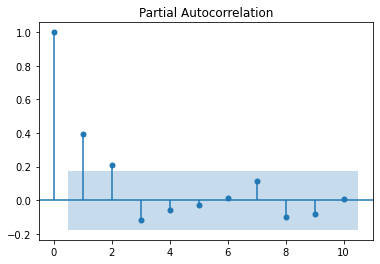

In [16]:
pacf_plot=plot_pacf(series,lags=10)

In [17]:
## PAcf also deminishes over time and that confirm what we have got from ACF so we can use MA(2)

## Splitting the Data to train and test sets

In [19]:
train_end=datetime(2019,12,30)
test_end=datetime(2020,1,1)
train_data=series[:train_end]
test_data=series[train_end + timedelta(days=1):test_end]

## Applying ARIMA model

In [20]:
model=ARIMA(train_data,order=(0,0,2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [21]:
fit=model.fit()

In [22]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  121
Model:                     ARMA(0, 2)   Log Likelihood                -171.013
Method:                       css-mle   S.D. of innovations              0.993
Date:                Thu, 16 Jun 2022   AIC                            350.025
Time:                        13:50:45   BIC                            361.208
Sample:                    09-01-2019   HQIC                           354.567
                         - 12-30-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.2104      0.144    348.876      0.000      49.928      50.492
ma.L1.y        0.3034      0.090      3.372      0.001       0.127       0.480
ma.L2.y        0.2976      0.076      3.898      0.000       0.148       0.447
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.5096           -1.7607j            1.8330           -0.2948
MA.2           -0.5096           +1.7607j            1.8330            0.2948
-----------------------------------------------------------------------------
"""

In [23]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [24]:
predictions=fit.predict(start=pred_start_date,end=pred_end_date)

In [25]:
residulas=test_data-predictions

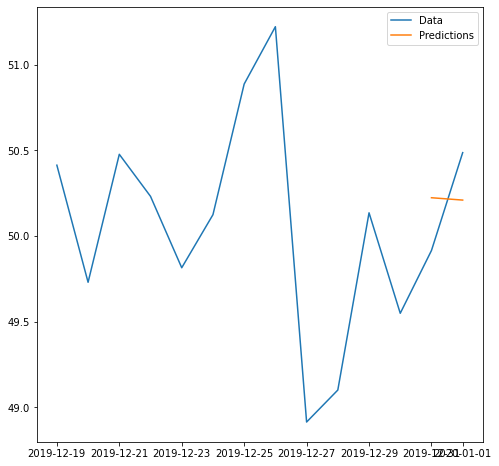

In [27]:
plt.figure(figsize=(8,8))
plt.plot(series[-14:])
plt.plot(predictions)
plt.legend(('Data','Predictions'))

In [28]:
from sklearn.metrics import mean_absolute_error

In [29]:
MAE=mean_absolute_error(residulas,test_data)

In [31]:
MAE

50.217216726945175

In [1]:
## We will check the results using the AR model